In [85]:
import numpy as np 
import cv2 
from hello import *
from matplotlib import pyplot as plt 



原图

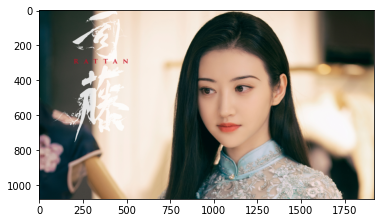

In [86]:
im_color = cv2.imread("./../images/siteng1.jpg")
im_color = cv2.cvtColor(im_color,cv2.COLOR_BGR2RGB)
plt.imshow(im_color)
plt.show()


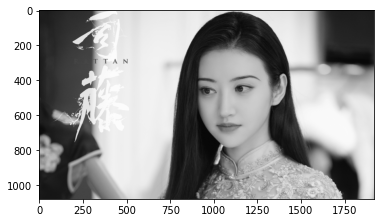

In [87]:
im = cv2.imread("./../images/siteng1.jpg",cv2.IMREAD_GRAYSCALE)
im_copy = cv2.cvtColor(im.copy(),cv2.COLOR_BGR2RGB)
plt.imshow(im_copy)
plt.show()

In [88]:
np.shape(im)

(1080, 1920)

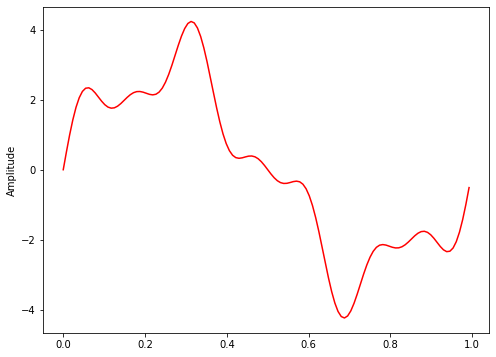

array([ 0.00000000e+00,  5.10738272e-01,  9.93931495e-01,  1.42462596e+00,
        1.78277039e+00,  2.05499841e+00,  2.23569420e+00,  2.32723432e+00,
        2.33939201e+00,  2.28798440e+00,  2.19292740e+00,  2.07592819e+00,
        1.95808267e+00,  1.85765252e+00,  1.78827092e+00,  1.75777254e+00,
        1.76776695e+00,  1.81398551e+00,  1.88733936e+00,  1.97554245e+00,
        2.06508717e+00,  2.14331998e+00,  2.20035443e+00,  2.23058033e+00,
        2.23357836e+00,  2.21432248e+00,  2.18263984e+00,  2.15198938e+00,
        2.13770390e+00,  2.15490792e+00,  2.21636552e+00,  2.33052401e+00,
        2.50000000e+00,  2.72070466e+00,  2.98173239e+00,  3.26604839e+00,
        3.55191746e+00,  3.81492861e+00,  4.03039891e+00,  4.17589304e+00,
        4.23357836e+00,  4.19215089e+00,  4.04811349e+00,  3.80625921e+00,
        3.47930073e+00,  3.08668292e+00,  2.65270622e+00,  2.20416615e+00,
        1.76776695e+00,  1.36759190e+00,  1.02290406e+00,  7.46512054e-01,
        5.43869112e-01,  

In [89]:
#samping rate
sr = 128
ts = 1.0/sr
t= np.arange(0,1,ts)

freq = 1.
x = 3 * np.sin(2 * np.pi*freq*t)
freq = 4 
x += np.sin(2*np.pi*freq*t)

freq = 7 
x+=0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8,6))
plt.plot(t,x,'r')
plt.ylabel("Amplitude")
plt.show()
x

In [90]:
from dft import *

In [91]:

def fft(x):
   
    N = len(x) 
    if N == 1: 
        return x 
    else: 
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        X = np.concatenate([
            X_even + factor[:int(N / 2)] * X_odd , 
            X_even + factor[int(N / 2) :]  * X_odd
            ])
        return X

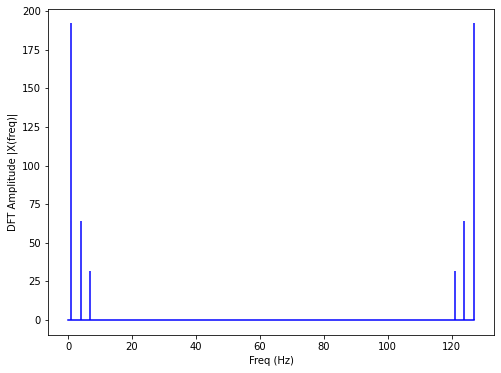

In [92]:

X = fft(x)
N = len(X)
n = np.arange(N)
T = N / sr
freq = n / T

plt.figure(figsize = (8,6))
plt.stem(freq,abs(X) , 'b' , markerfmt= " " , basefmt='-b')
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.show()

/home/zhx/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


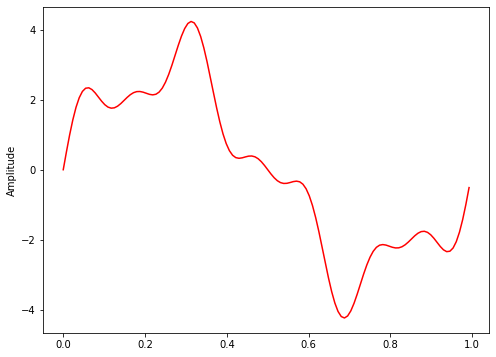

array([-1.41127239e-15-3.24251983e-16j,  5.10738272e-01+1.23113002e-15j,
        9.93931495e-01-3.27156264e-16j,  1.42462596e+00-4.69283985e-16j,
        1.78277039e+00-5.74735424e-16j,  2.05499841e+00-9.48856890e-17j,
        2.23569420e+00-3.33914250e-15j,  2.32723432e+00-2.07635653e-15j,
        2.33939201e+00-2.38632180e-15j,  2.28798440e+00+4.53271541e-16j,
        2.19292740e+00-3.75873487e-15j,  2.07592819e+00-9.08366178e-15j,
        1.95808267e+00-1.02237334e-14j,  1.85765252e+00+8.96214545e-15j,
        1.78827092e+00-6.12103761e-15j,  1.75777254e+00-1.43180599e-14j,
        1.76776695e+00-1.02714817e-15j,  1.81398551e+00+1.32963924e-15j,
        1.88733936e+00+4.60654003e-15j,  1.97554245e+00-1.08285236e-14j,
        2.06508717e+00-8.54852459e-15j,  2.14331998e+00+1.25716604e-14j,
        2.20035443e+00-2.01751009e-14j,  2.23058033e+00-2.57945075e-14j,
        2.23357836e+00-1.07206409e-14j,  2.21432248e+00+2.39822394e-14j,
        2.18263984e+00+1.91668591e-14j,  2.15198938

In [93]:

x= idft(X)
plt.figure(figsize=(8,6))
plt.plot(t,x,'r')
plt.ylabel("Amplitude")
plt.show()
x

In [94]:
dft2im = dft2(im)
dft2absim = np.log(np.abs(dft2im))


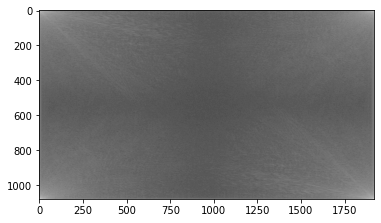

In [95]:
plt.imshow(dft2absim,'gray')

In [96]:
f = np.fft.fft2(im)

#fshift = np.fft.fftshift(f)
ffimg = np.log(np.abs(f))
f

array([[ 3.01957957e+08       +0.j        ,
        -1.11455805e+07-19642345.5386956j ,
        -5.79123483e+07+25689056.9373436j , ...,
         1.06258606e+07-33577513.85664654j,
        -5.79123483e+07-25689056.93734359j,
        -1.11455805e+07+19642345.5386956j ],
       [-2.04781009e+07 +3302871.6712635j ,
        -1.80703158e+07+12856330.74047089j,
        -3.55009829e+06 +2344203.60999466j, ...,
         1.96123497e+07+34866891.39121838j,
        -1.50427197e+07+10033837.70516863j,
        -4.41774251e+06+15795539.58748821j],
       [ 1.21166495e+07 +4343791.83143819j,
        -9.08263796e+06 +7520581.22333035j,
         7.18388535e+06  -252048.38882904j, ...,
        -2.32660844e+06 +6624658.59481462j,
        -1.16968075e+07 -2125218.21251255j,
         6.82755935e+06 -7947645.26932676j],
       ...,
       [ 8.74420674e+05  +868555.97463416j,
        -6.50386241e+05 +5689649.57132232j,
         1.19980881e+06 +2220189.25326657j, ...,
        -4.91241612e+06 -3235738.78679354

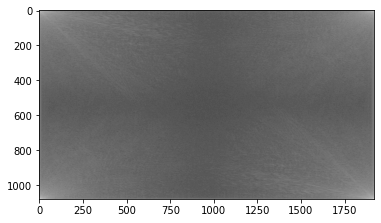

In [97]:
plt.imshow(ffimg,"gray")

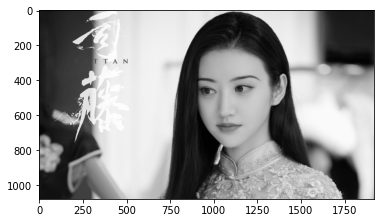

In [98]:
#f1shift = np.fft.ifftshift(fshift)
imback = np.fft.ifft2(dft2im)
imback = np.abs(imback)
plt.imshow(imback,"gray")

In [101]:
def fft2(x):
  h,w = x.shape
  print(h,w)
  X = np.zeros((h,w) ,dtype=complex)
  for r in range(h) :
    for c in range(w):
      X[:,c] += fft(x[:,c])
    X[r,:] += fft(x[r,:])
  return X 

In [100]:
X = fft2(imback[:512,:512])
X

512 512


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'